<a href="https://colab.research.google.com/github/kavyakalivarapu-lab/ML-project/blob/main/SocialMedia_sentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading Dataset From Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/MyDrive/ML/sem_project/SocialMedia.csv'
df=pd.read_csv(path)

**Data Exploration** **and Data Cleaning**

In [4]:
df.shape

(2000, 3)

In [5]:
df.dtypes

,0
Id,int64
Body,object
Sentiment Type,object


In [6]:
df.isnull().sum()

,0
Id,0
Body,228
Sentiment Type,0


In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

,0
Id,0
Body,0
Sentiment Type,0


In [9]:
df.drop(['Id'],axis=1,inplace=True)

In [10]:
df.shape

(1772, 2)

In [11]:
df.rename(columns={'Body':'Tweets','Sentiment Type':'Tweet Type'},inplace=True)

In [13]:
df.columns

Index(['Tweets', 'Tweet Type'], dtype='object')

In [14]:
x=pd.DataFrame(df['Tweets'])
y=pd.DataFrame(df['Tweet Type'])

In [15]:
x.columns

Index(['Tweets'], dtype='object')

**Data Preprocessing**

**Text Normalization**

Importing necessary libraries for text normalization

In [16]:
import re
import nltk
!pip install emoji
import emoji
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import unicodedata
from bs4 import BeautifulSoup


#downloading NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 7.0 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [53]:
def clean_text(text):
 # Convert to string, lower case, and strip whitespace
  text = str(text).lower().strip()

    # Replace specific symbols
  text = text.replace('%', 'percent').replace('$', 'dollar')

    # Remove emojis
  text = emoji.replace_emoji(text, replace='')

    # Replace large numbers with abbreviations
  text = re.sub(r'(\d{1,3}(?:,\d{3})*)', lambda x: format_large_number(x.group(0)), text)

    # Remove unwanted characters
  text = re.sub(r'[^a-zA-Z\s]', ' ', text)
  text = re.sub(r'<[^>]*>', ' ', text)  # Remove HTML tags

    # Handle contractions
  contractions = {
        "ain't": "am not",
        "aren't": "are not",
        "can't": "cannot",
        "could've": "could have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hasn't": "has not",
        "haven't": "have not",
        "isn't": "is not",
        "it's": "it is",
        "I'm": "I am",
        "you're": "you are",
        "they're": "they are"
    }

    # Decontract words
  text_decontracted = [contractions.get(word, word) for word in text.split()]
  text = ' '.join(text_decontracted)

    # Normalize the text
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # Remove HTML tags
  text = BeautifulSoup(text, 'html.parser').get_text()

    # Remove stop words and lemmatize
  text = ' '.join(word for word in text.split() if word not in stop_words)
  text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())

  return text
def format_large_number(num_str):
  num_str = num_str.replace(',', '')
  num = int(num_str)
  if num >= 1_000_000_000:
    return f'{num // 1_000_000_000}b'
  elif num >= 1_000_000:
    return f'{num // 1_000_000}m'
  elif num >= 1_000:
    return f'{num // 1_000}k'
  return num_str

In [54]:
def threshold_text(text, min_length=3, max_length=15):
    # Normalize the text (lowercase and remove punctuation)
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Keep only letters and spaces

    # Split the text into words
    words = text.split()

    # Filter words based on length
    filtered_words = [word for word in words if min_length <= len(word) <= max_length]

    # Join the filtered words back into a single string
    filtered_text = ' '.join(filtered_words)

    return filtered_text

In [20]:
x['Tweets']=x['Tweets'].apply(clean_text)


In [21]:
x["Tweets"]=x["Tweets"].apply(threshold_text)

In [52]:
print("Cleaned text ")
x.head()

Cleaned text 


,Tweets
0,rule mete polarizing political topic vulnerabl...
2,politics danger make propaganda meme telling p...
3,senate get stabbed
4,suicide
5,removed


In [23]:
x.isnull().sum()

,0
Tweets,0


**Data Visualization**

<ipython-input-24-f4e3e6373648>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=y,x='Tweet Type',palette='coolwarm')


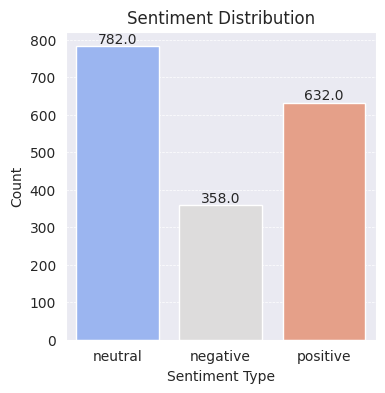

In [24]:
plt.figure(figsize=(4,4))
sns.set_style("darkgrid")
ax=sns.countplot(data=y,x='Tweet Type',palette='coolwarm')
for p in ax.patches:
  ax.annotate(f'{p.get_height()}',(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='bottom')

plt.xlabel("Sentiment Type")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.grid(axis='y',linestyle='--',linewidth=0.5)
plt.show()

Largest Tweet Lengths [519 512 504 469 423 405 397 347 329 318 316 314 307 301 293 290 279 276
 272 268 266 262 255 253 244 242 239]


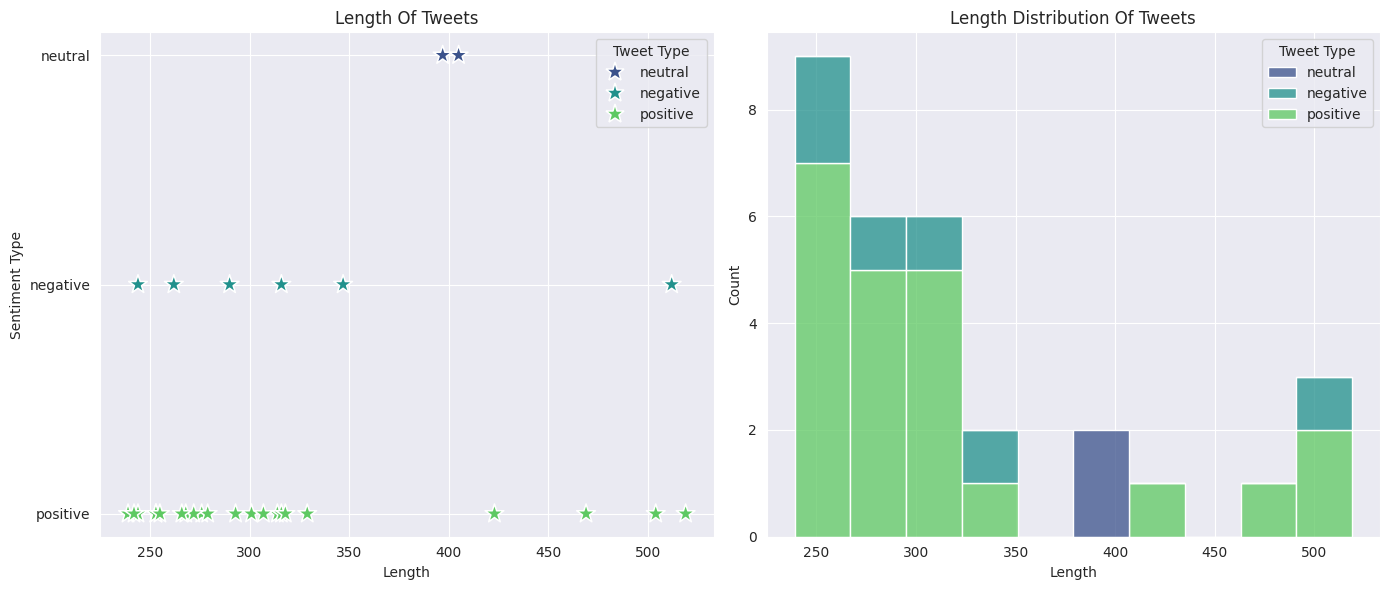

In [25]:
largest_tweet_len=x['Tweets'].str.len().nlargest(30).unique()
filtered_data=x[x['Tweets'].str.len().isin(largest_tweet_len)]
print("Largest Tweet Lengths",largest_tweet_len)
fig,axes=plt.subplots(1,2,figsize=(14,6))
sns.scatterplot(x=filtered_data['Tweets'].str.len(),y=y['Tweet Type']
                ,ax=axes[0],hue=y['Tweet Type'],palette='viridis',marker='*',s=200)
axes[0].set_title("Length Of Tweets")
axes[0].set_xlabel("Length")
axes[0].set_ylabel("Sentiment Type")

sns.histplot(x=filtered_data['Tweets'].str.len(),ax=axes[1],hue=y['Tweet Type'],
             multiple='stack',bins=10,palette='viridis')
axes[1].set_title("Length Distribution Of Tweets")
axes[1].set_xlabel("Length")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

**Train Test Split**

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

**Feauture Selection** **using TFIDF**

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
# Feature Extraction using TF-IDF
tfidf=TfidfVectorizer()
x_train_tfidf=tfidf.fit_transform(x_train['Tweets'].astype(str))
x_test_tfidf=tfidf.transform(x_test['Tweets'].astype(str))

# Show the shape of transformed data
print("\n TF-IDF feature matrix shape for training data:",x_train.shape)
print("\n TF-IDF feature matrix shape for test data:",x_test.shape)


 TF-IDF feature matrix shape for training data: (1240, 1)

 TF-IDF feature matrix shape for test data: (532, 1)


**Select Best Model**

In [36]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [38]:
models={'Random Forest':RandomForestClassifier(),
        'Gradient Boosting':GradientBoostingClassifier(),
        'SVC':SVC(),
        'KNN':KNeighborsClassifier(),
        "Naive Baye's":GaussianNB(),
        'Decison Tree':DecisionTreeClassifier(),
        'Logistic Regression':LogisticRegression()}

In [39]:
best_model=None
best_accuracy=0
results=[]
for name,model in models.items():
  if name=="Naive Baye's":
   model.fit(x_train_tfidf.toarray(),y_train)
   y_pred=model.predict(x_train_tfidf.toarray())
  else:
    model.fit(x_train_tfidf,y_train)
    y_pred=model.predict(x_train_tfidf)

  accuracy=accuracy_score(y_train,y_pred)
  results.append({'Model':name,'Accuracy':accuracy})
  print(f'{name}.......\n')
  if accuracy>best_accuracy:
    best_accuracy=accuracy
    best_model=model
best_model_d=pd.DataFrame(results)
print(best_model_d)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest.......



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting.......



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC.......

KNN.......



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Naive Baye's.......

Decison Tree.......

Logistic Regression.......

                 Model  Accuracy
0        Random Forest  1.000000
1    Gradient Boosting  0.834677
2                  SVC  0.995161
3                  KNN  0.448387
4         Naive Baye's  0.871774
5         Decison Tree  1.000000
6  Logistic Regression  0.921774


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<ipython-input-40-72ee3a70cd16>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot=sns.barplot(x=best_model_d['Accuracy'],y=best_model_d['Model'],palette='Paired')


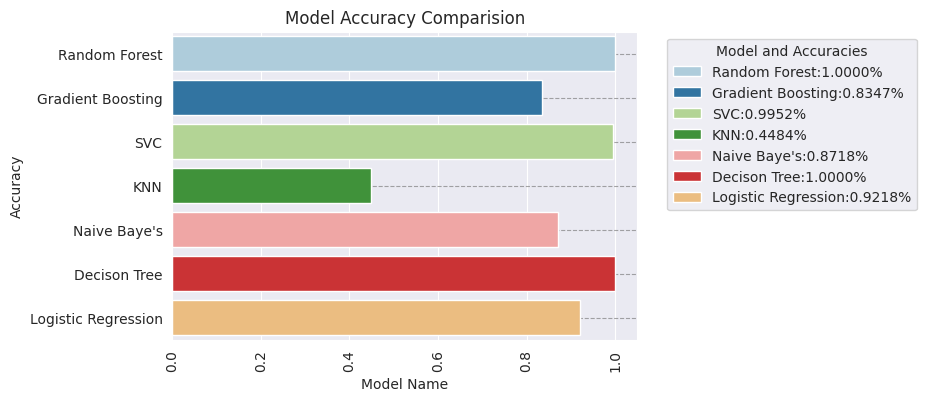

In [40]:
plt.figure(figsize=(6,4))
barplot=sns.barplot(x=best_model_d['Accuracy'],y=best_model_d['Model'],palette='Paired')
plt.xlabel("Model Name")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparision")
plt.xticks(rotation=90)
plt.grid(axis='y',linestyle='--',alpha=0.7,color='gray')
for i,(model,accuracy) in enumerate(zip(best_model_d['Model'],best_model_d['Accuracy'])):
  barplot.patches[i].set_label(f'{model}:{accuracy:.4f}%')
plt.legend(title='Model and Accuracies',bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()


**Feature Importance**

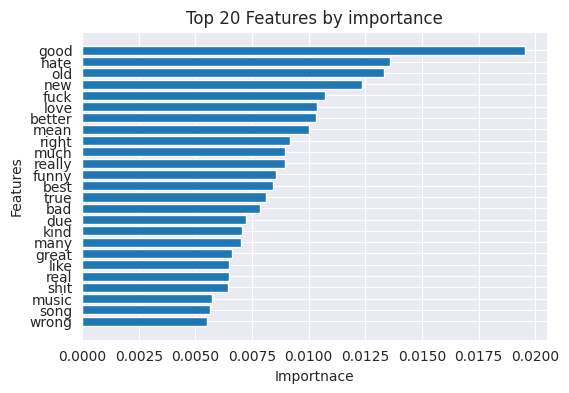

In [41]:
features_names=tfidf.get_feature_names_out()
coefficients=best_model.feature_importances_
# Create a DataFrame to hold feature names and their importance
feature_importance=pd.DataFrame({'Feature':features_names,'Importance':np.abs(coefficients)})
#sort by importance
feature_importance=feature_importance.sort_values(by='Importance',ascending=False)
top_features=feature_importance.head(25)
plt.figure(figsize=(6,4))
plt.barh(top_features['Feature'],top_features['Importance'])
plt.xlabel("Importnace")
plt.ylabel("Features")
plt.title("Top 20 Features by importance")
plt.gca().invert_yaxis() #To display the highest importance at the top
plt.show()



**Predict Test Data**

In [43]:
model=LogisticRegression(max_iter=1000,random_state=42)
model.fit(x_train_tfidf,y_train)
y_test_pred=model.predict(x_test_tfidf)
accuracy=accuracy_score(y_test['Tweet Type'],y_test_pred)
print(f'Accuracy on test data:{accuracy:.4f}')
test_results=x_test.copy() #using test dataset ,creating an another copy named test_results
test_results['Sentiment Type']=y_test_pred
test_results[['Tweets','Sentiment Type']].to_csv('test_predictions.csv',index=False)

Accuracy on test data:0.6955


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
nb=GaussianNB()
nb.fit(x_train_tfidf.toarray(),y_train)
y_test_pred=model.predict(x_test_tfidf)
accuracy=accuracy_score(y_test['Tweet Type'],y_test_pred)
print(f'Accuracy on test data:{accuracy:.4f}')

Accuracy on test data:0.6955


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Saving The Model**

In [55]:
import joblib
joblib.dump(best_model,'best_model.pkl')
joblib.dump(tfidf,'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [56]:
import os
os.getcwd()

'/content'